Number of samples: 1000
Number of samples: 1000
Number of samples: 1000


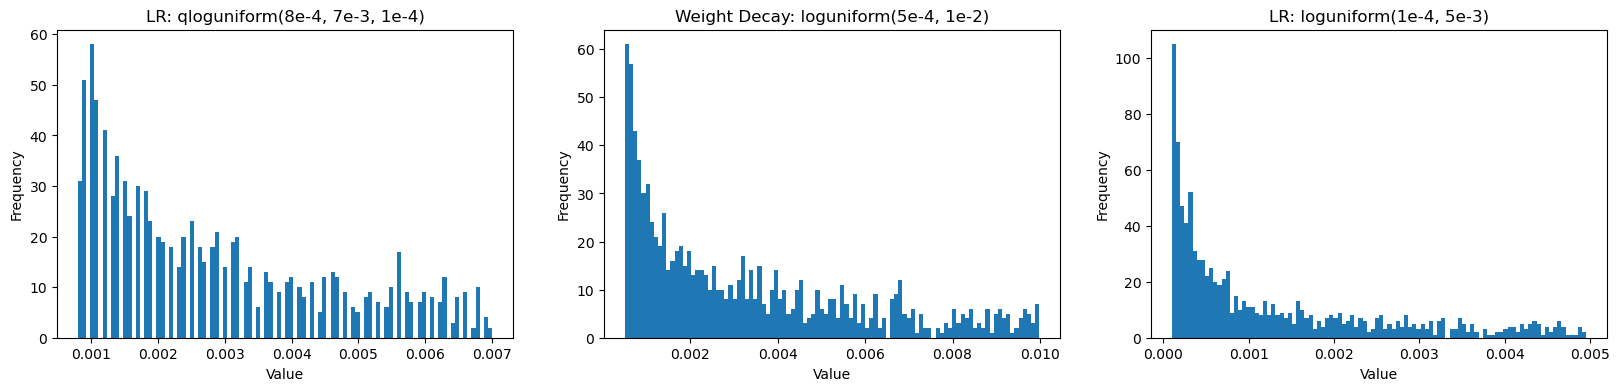

In [13]:
import ray
from ray import tune
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# Generate 100 samples from this distribution
np.random.seed(42)  # For reproducibility

def sample_distribution(distribution,title):
    samples = [distribution.sample() for _ in range(1000)]

    # Print summary statistics
    print(f"Number of samples: {len(samples)}")
    if False:
        print(f"Unique values: {sorted(set(samples))}")
        print(f"Value counts: {np.unique(samples, return_counts=True)[1]}")

    df_samples = pd.DataFrame(samples)
    return df_samples


# Create a quantized uniform distribution from 1 to 4 with step size 1
distribution = tune.choice([1.0, 2.0, 3.0, 4.0])  # 
distribution = tune.randint(1,5)
distribution = tune.qlograndint(0.1, 4, 2)
distribution_qlog_8e4_7e3_1e4 = tune.qloguniform(8e-4, 7e-3, 1e-4)
distribution_5e4_1e2 = tune.loguniform(5e-4, 1e-2)
distribution_log_1e4_5e3 = tune.loguniform(1e-4,5e-3)

distributions = [distribution_qlog_8e4_7e3_1e4,
                 distribution_5e4_1e2,
                 distribution_log_1e4_5e3
                 ]
titles = ["LR: qloguniform(8e-4, 7e-3, 1e-4)",
            "Weight Decay: loguniform(5e-4, 1e-2)",
            "LR: loguniform(1e-4, 5e-3)"
            ]

bins = 100

fig, axes = plt.subplots(nrows=1, ncols=len(distributions),figsize=(20, 4))
for k,(distrib,title) in enumerate(zip(distributions,titles)):

    sample_distrib = sample_distribution(distrib,title)

    # Plot the histogram
    #axes[k] = sample_distrib.hist(bins = bins)
    axes[k].hist(sample_distrib,bins = bins)
    axes[k].set_xlabel('Value')
    axes[k].set_ylabel('Frequency')
    axes[k].set_title(title)

plt.show()




In [ ]:
from ray import tune 
import pandas as pd
choices = [8,16,32,64,128,256]
distrib1 = tune.choice(choices)

n = 1000

samples =[np.log2(distrib1.sample()) for k in range(n)]
df_samples = pd.DataFrame(samples,columns = ['sample'])
df_samples.hist(bins = len(choices))